 <h1>PRE PROCESSING AND EDA</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('US_Accidents_Dec20_Updated.csv')

In [4]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [6]:
df.nunique()

ID                       1516064
Severity                       4
Start_Time               1037092
End_Time                 1161415
Start_Lat                 590611
Start_Lng                 603369
End_Lat                   587824
End_Lng                   599916
Distance(mi)               11514
Description               527655
Number                     37592
Street                     93048
Side                           2
City                       10657
County                      1671
State                         49
Zipcode                   177196
Country                        1
Timezone                       4
Airport_Code                1985
Weather_Timestamp         331748
Temperature(F)               775
Wind_Chill(F)                883
Humidity(%)                  100
Pressure(in)                1007
Visibility(mi)                74
Wind_Direction                24
Wind_Speed(mph)              121
Precipitation(in)            187
Weather_Condition            116
Amenity   

In [7]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


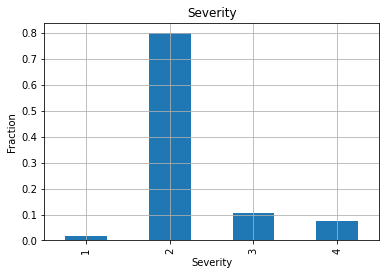

In [8]:
df.Severity.value_counts(normalize=True).sort_index().plot.bar()
plt.grid()
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Fraction');

In [9]:
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
booldf = df[bool_cols]
not_one_hot = booldf[booldf.sum(axis=1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(df)))

There are 88896 non one hot metadata rows, which are 5.9% of the data


In [10]:
bools = booldf.sum(axis=0)

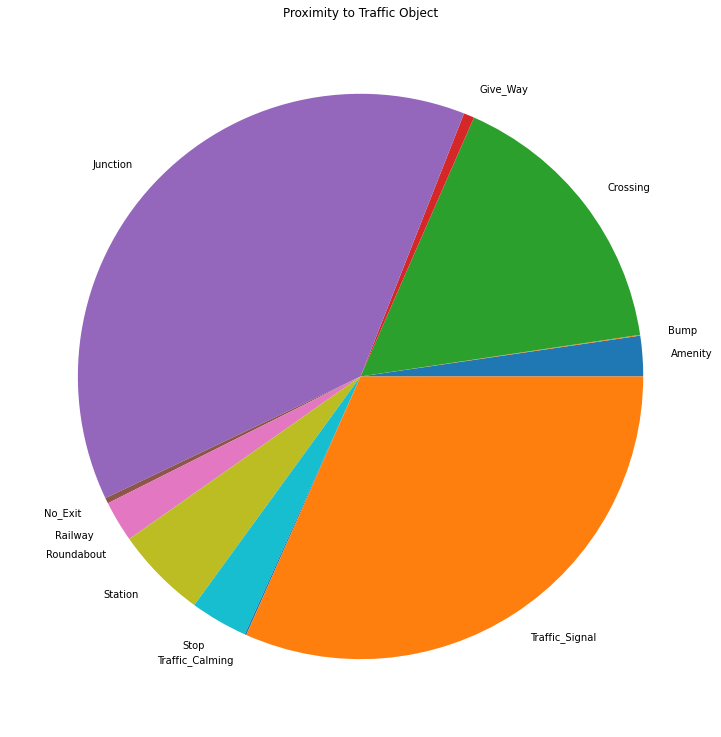

In [11]:
bools.plot.pie(figsize=(13,13))
plt.ylabel('')
plt.title('Proximity to Traffic Object');

In [12]:
st = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')

top 20 accident durations correspond to 59.4% of the data


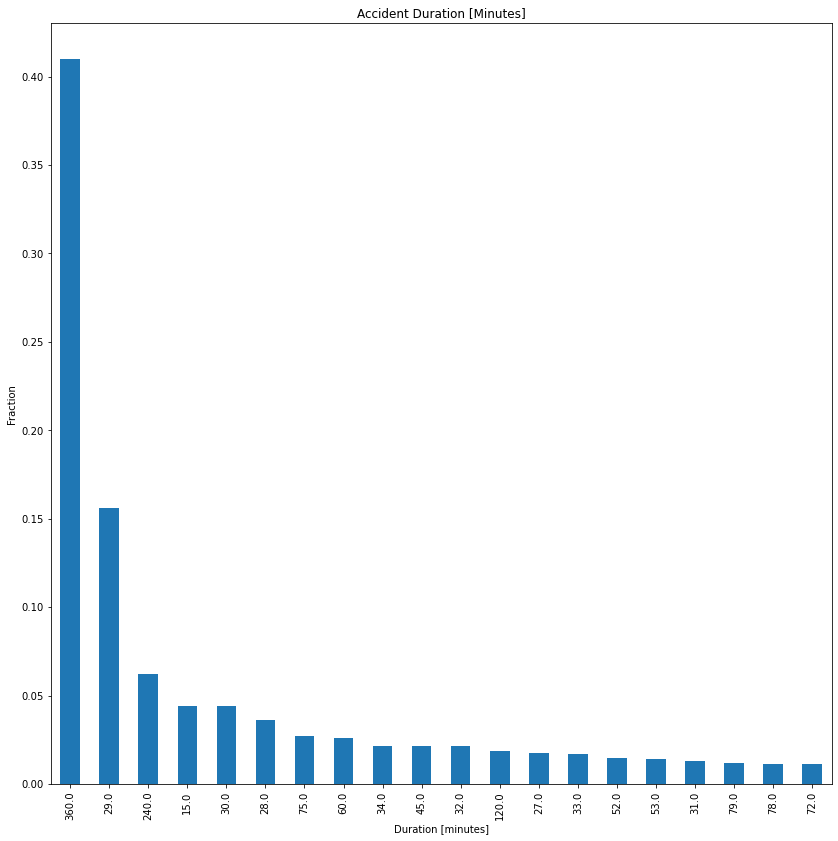

In [13]:
diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(14,14))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

In [14]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 05:56:20,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:15:39,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:15:39,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:51:45,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


<ipython-input-15-39a10e5ddb97>:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  sample = df.ID['2016':].resample(fr).count()
<ipython-input-15-39a10e5ddb97>:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  sample = df.ID['2016':].resample(fr).count()
<ipython-input-15-39a10e5ddb97>:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  sample = df.ID['2016':].resample(fr).count()


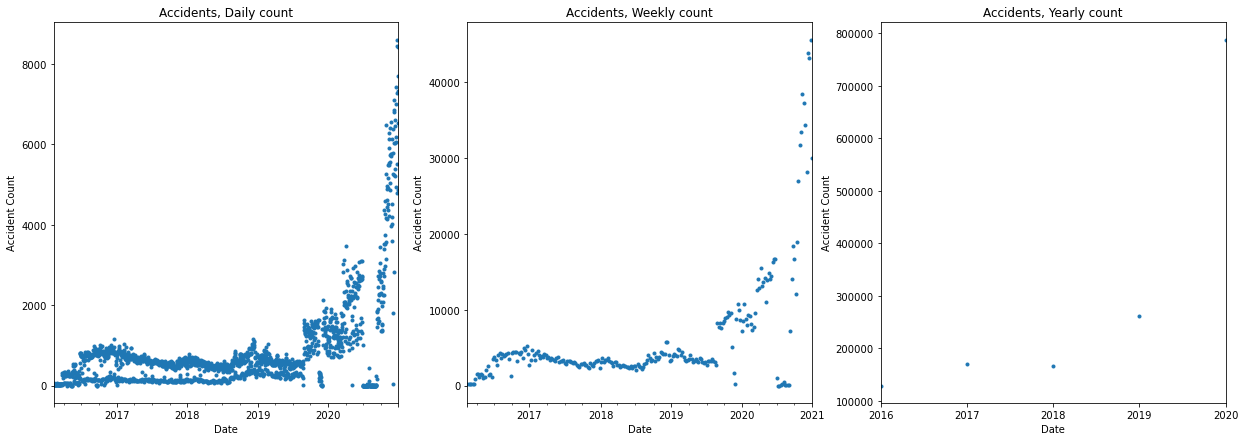

In [15]:
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}
plt.subplots(1,3,figsize=(21,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = df.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

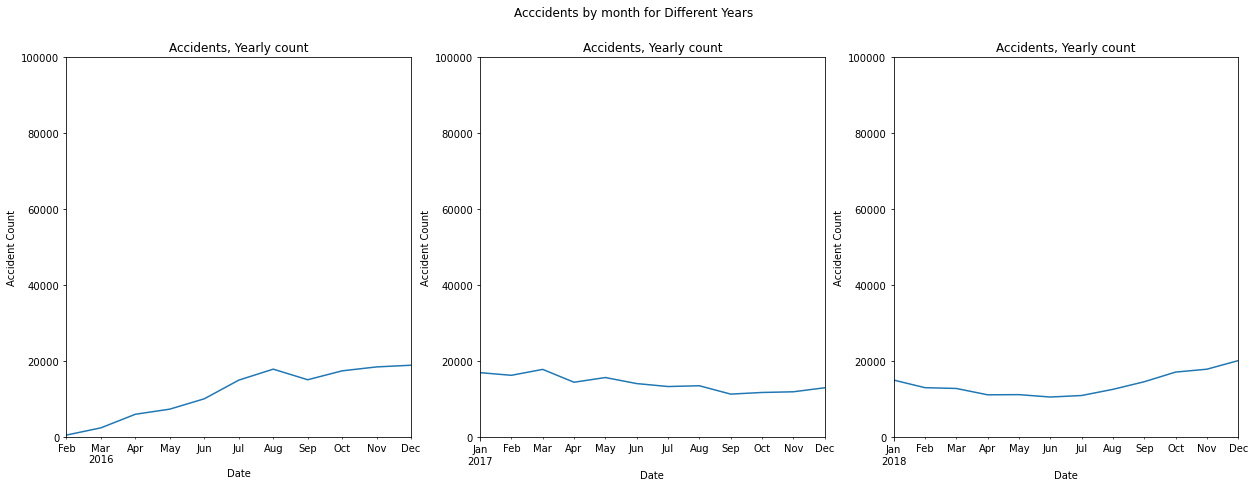

In [16]:
years = ['2016','2017','2018']
fig, _ = plt.subplots(1,3,figsize=(21,7), sharex='all', sharey='all')

fig.suptitle('Acccidents by month for Different Years')
plt.xlabel('month')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    plt.subplot(1,3,i)
    sample = df.loc[year].ID.resample('M').count()
    sample.plot()
    plt.ylim(0,100000)
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

In [17]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix, fontsize=15')
    plt.show()

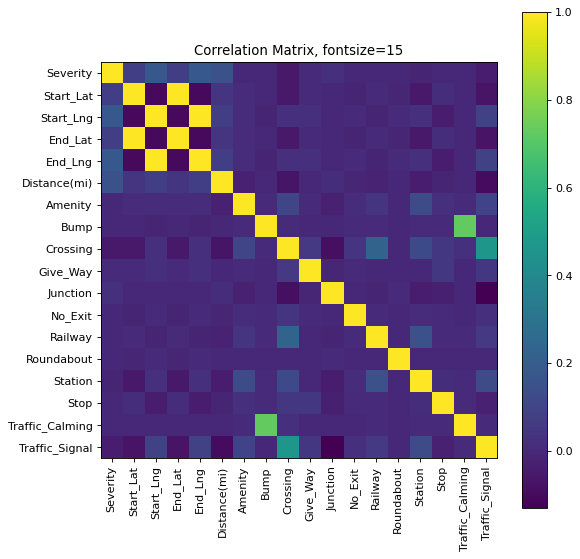

In [18]:
plotCorrelationMatrix(df, 8)

In [19]:
df1 = df

In [20]:
df1.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [21]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 05:56:20,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:15:39,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:15:39,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:51:45,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [22]:
df1 = df1.drop(['Distance(mi)', 'Country', 'Description', 'City', 'County', 'Street', 'Side', 'Zipcode', 'State', 'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)

In [23]:
df1.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Number,Timezone,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,NaN,US/Eastern,...,False,False,False,False,False,False,False,False,False,Night
2016-02-08 05:56:20,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,NaN,US/Eastern,...,False,False,False,False,False,False,False,False,False,Night
2016-02-08 06:15:39,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,NaN,US/Eastern,...,True,False,False,False,False,False,False,False,False,Night
2016-02-08 06:15:39,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,NaN,US/Eastern,...,True,False,False,False,False,False,False,False,False,Night
2016-02-08 06:51:45,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,NaN,US/Eastern,...,False,False,False,False,False,False,False,False,False,Night


In [24]:
cols = ["End_Lat", "End_Lng", "Number"]
df1 = df1.drop(cols, axis=1)

In [25]:
df1.isnull().sum()

ID                        0
Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
Timezone               2302
Weather_Timestamp     30264
Temperature(F)        43033
Wind_Chill(F)        449316
Humidity(%)           45509
Pressure(in)          36274
Visibility(mi)        44211
Wind_Direction        41858
Wind_Speed(mph)      128862
Precipitation(in)    510549
Weather_Condition     44007
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop              0
Sunrise_Sunset           83
dtype: int64

In [26]:
pmean = df1['Pressure(in)'].mean()
tmean = df1['Temperature(F)'].mean()
wcmean = df1['Wind_Chill(F)'].mean()
hmean = df1['Humidity(%)'].mean()
wsmean = df1['Wind_Speed(mph)'].mean()
prmean = df1['Precipitation(in)'].mean()

In [27]:
df1['Pressure(in)']=df1['Pressure(in)'].fillna(pmean)

In [28]:
df1['Temperature(F)'] = df1['Temperature(F)'].fillna(tmean)

In [29]:
df1['Wind_Chill(F)'] = df1['Wind_Chill(F)'].fillna(wcmean)

In [30]:
df1['Humidity(%)'] = df1['Humidity(%)'].fillna(hmean)

In [31]:
df1['Wind_Speed(mph)'] = df1['Wind_Speed(mph)'].fillna(wsmean)

In [32]:
df1['Precipitation(in)']=df1['Precipitation(in)'].fillna(prmean)

In [33]:
df1.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Timezone              2302
Weather_Timestamp    30264
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)       44211
Wind_Direction       41858
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition    44007
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset          83
dtype: int64

In [34]:
df1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Timezone', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

In [35]:
visMode = df1["Visibility(mi)"].mode()
#df1["Visibility(mi)"]=df1["Visibility(mi)"].fillna(visMode)

In [36]:
#df1["Visibility(mi)"]=df1["Visibility(mi)"].fillna(visMode)
df1['Visibility(mi)'] = df1['Visibility(mi)'].fillna(df1['Visibility(mi)'].mode()[0])
df1['Wind_Direction'] = df1['Wind_Direction'].fillna(df1['Wind_Direction'].mode()[0])
df1['Weather_Condition'] = df1['Weather_Condition'].fillna(df1['Weather_Condition'].mode()[0])
df1['Sunrise_Sunset'] = df1['Sunrise_Sunset'].fillna(df1['Sunrise_Sunset'].mode()[0])

In [37]:
df1.drop(['Timezone','Weather_Timestamp', 'Start_Time', 'End_Time', 'ID'], axis = 1, inplace = True)

In [38]:
df1.dropna(axis=0, inplace=True)

In [39]:
df1.isnull().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
dtype: int64

In [40]:
df1.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

In [41]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Amenity'] = label_encoder.fit_transform(df1['Amenity'])
df1['Bump'] = label_encoder.fit_transform(df1['Bump'])
df1['Crossing'] = label_encoder.fit_transform(df1['Crossing'])
df1['Give_Way'] = label_encoder.fit_transform(df1['Give_Way'])
df1['Junction'] = label_encoder.fit_transform(df1['Junction'])
df1['No_Exit'] = label_encoder.fit_transform(df1['No_Exit'])
df1['Railway'] = label_encoder.fit_transform(df1['Railway'])
df1['Roundabout'] = label_encoder.fit_transform(df1['Roundabout'])
df1['Station'] = label_encoder.fit_transform(df1['Station'])
df1['Stop'] = label_encoder.fit_transform(df1['Stop'])
df1['Traffic_Calming'] = label_encoder.fit_transform(df1['Traffic_Calming'])
df1['Traffic_Signal'] = label_encoder.fit_transform(df1['Traffic_Signal'])
df1['Turning_Loop'] = label_encoder.fit_transform(df1['Turning_Loop'])
df1.head()


,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,3,40.10891,-83.09286,42.1,36.10000,58.0,29.76,10.0,SW,10.400000,...,0,0,0,0,0,0,0,0,0,Night
2016-02-08 05:56:20,2,39.86542,-84.06280,36.9,55.10976,91.0,29.68,10.0,Calm,7.630812,...,0,0,0,0,0,0,0,0,0,Night
2016-02-08 06:15:39,2,39.10266,-84.52468,36.0,55.10976,97.0,29.70,10.0,Calm,7.630812,...,1,0,0,0,0,0,0,0,0,Night
2016-02-08 06:15:39,2,39.10148,-84.52341,36.0,55.10976,97.0,29.70,10.0,Calm,7.630812,...,1,0,0,0,0,0,0,0,0,Night
2016-02-08 06:51:45,2,41.06213,-81.53784,39.0,55.10976,55.0,29.65,10.0,Calm,7.630812,...,0,0,0,0,0,0,0,0,0,Night


In [42]:
df1['Sunrise_Sunset'] = label_encoder.fit_transform(df1['Sunrise_Sunset'])
df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
df1['Wind_Direction'] = label_encoder.fit_transform(df1['Wind_Direction'])
df1.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,3,40.10891,-83.09286,42.1,36.10000,58.0,29.76,10.0,16,10.400000,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 05:56:20,2,39.86542,-84.06280,36.9,55.10976,91.0,29.68,10.0,1,7.630812,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 06:15:39,2,39.10266,-84.52468,36.0,55.10976,97.0,29.70,10.0,1,7.630812,...,1,0,0,0,0,0,0,0,0,1
2016-02-08 06:15:39,2,39.10148,-84.52341,36.0,55.10976,97.0,29.70,10.0,1,7.630812,...,1,0,0,0,0,0,0,0,0,1
2016-02-08 06:51:45,2,41.06213,-81.53784,39.0,55.10976,55.0,29.65,10.0,1,7.630812,...,0,0,0,0,0,0,0,0,0,1


In [43]:
Y = df1['Severity']

In [44]:
X = df1.drop(['Severity'], axis = 1)


In [45]:
X.head()

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,40.10891,-83.09286,42.1,36.10000,58.0,29.76,10.0,16,10.400000,0.000000,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 05:56:20,39.86542,-84.06280,36.9,55.10976,91.0,29.68,10.0,1,7.630812,0.020000,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 06:15:39,39.10266,-84.52468,36.0,55.10976,97.0,29.70,10.0,1,7.630812,0.020000,...,1,0,0,0,0,0,0,0,0,1
2016-02-08 06:15:39,39.10148,-84.52341,36.0,55.10976,97.0,29.70,10.0,1,7.630812,0.020000,...,1,0,0,0,0,0,0,0,0,1
2016-02-08 06:51:45,41.06213,-81.53784,39.0,55.10976,55.0,29.65,10.0,1,7.630812,0.008478,...,0,0,0,0,0,0,0,0,0,1


In [46]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X)
train_img = pca.transform(X)
train = pd.DataFrame(train_img)
train.head()

,0,1,2,3,4
0,19.131995,12.497130,12.927815,23.531968,3.346149
1,25.598544,25.730827,-11.705674,0.533693,-12.514850
2,48.907760,23.292314,-10.912946,-3.316664,-13.267210
3,48.907928,23.292385,-10.913789,-3.315677,-13.267347
4,38.294194,-2.520745,9.739741,20.249891,-17.481105


In [47]:
train.shape

(1516064, 5)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.2, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
#test_img = scaler.transform(test_img)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

,0,1,2,3,4
0,-0.572148,0.320867,-0.811943,0.964298,-1.085302
1,-0.486639,1.579659,-0.702213,0.581318,0.250483
2,-0.571171,0.321187,-0.819225,0.974582,-1.086519
3,1.159889,-0.630767,-0.954960,0.293795,0.074592
4,-0.821734,0.214027,1.070306,-0.617576,-1.475426


In [50]:
from sklearn.preprocessing import StandardScaler
scalert = StandardScaler()
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)

 <h1>LOGISTIC REGRESSION</h1>


In [51]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Amenity'] = label_encoder.fit_transform(df1['Amenity'])
df1['Bump'] = label_encoder.fit_transform(df1['Bump'])
df1['Crossing'] = label_encoder.fit_transform(df1['Crossing'])
df1['Give_Way'] = label_encoder.fit_transform(df1['Give_Way'])
df1['Junction'] = label_encoder.fit_transform(df1['Junction'])
df1['No_Exit'] = label_encoder.fit_transform(df1['No_Exit'])
df1['Railway'] = label_encoder.fit_transform(df1['Railway'])
df1['Roundabout'] = label_encoder.fit_transform(df1['Roundabout'])
df1['Station'] = label_encoder.fit_transform(df1['Station'])
df1['Stop'] = label_encoder.fit_transform(df1['Stop'])
df1['Traffic_Calming'] = label_encoder.fit_transform(df1['Traffic_Calming'])
df1['Traffic_Signal'] = label_encoder.fit_transform(df1['Traffic_Signal'])
df1['Turning_Loop'] = label_encoder.fit_transform(df1['Turning_Loop'])
df1.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,3,40.10891,-83.09286,42.1,36.10000,58.0,29.76,10.0,16,10.400000,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 05:56:20,2,39.86542,-84.06280,36.9,55.10976,91.0,29.68,10.0,1,7.630812,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 06:15:39,2,39.10266,-84.52468,36.0,55.10976,97.0,29.70,10.0,1,7.630812,...,1,0,0,0,0,0,0,0,0,1
2016-02-08 06:15:39,2,39.10148,-84.52341,36.0,55.10976,97.0,29.70,10.0,1,7.630812,...,1,0,0,0,0,0,0,0,0,1
2016-02-08 06:51:45,2,41.06213,-81.53784,39.0,55.10976,55.0,29.65,10.0,1,7.630812,...,0,0,0,0,0,0,0,0,0,1


In [52]:
df1['Sunrise_Sunset'] = label_encoder.fit_transform(df1['Sunrise_Sunset'])
df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
df1['Wind_Direction'] = label_encoder.fit_transform(df1['Wind_Direction'])

df1.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,3,40.10891,-83.09286,42.1,36.10000,58.0,29.76,10.0,16,10.400000,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 05:56:20,2,39.86542,-84.06280,36.9,55.10976,91.0,29.68,10.0,1,7.630812,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 06:15:39,2,39.10266,-84.52468,36.0,55.10976,97.0,29.70,10.0,1,7.630812,...,1,0,0,0,0,0,0,0,0,1
2016-02-08 06:15:39,2,39.10148,-84.52341,36.0,55.10976,97.0,29.70,10.0,1,7.630812,...,1,0,0,0,0,0,0,0,0,1
2016-02-08 06:51:45,2,41.06213,-81.53784,39.0,55.10976,55.0,29.65,10.0,1,7.630812,...,0,0,0,0,0,0,0,0,0,1


In [53]:
df1.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

In [54]:
Y = df1['Severity']

In [55]:
X = df1.drop(['Severity'], axis = 1)


In [56]:
X.head()

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,40.10891,-83.09286,42.1,36.10000,58.0,29.76,10.0,16,10.400000,0.000000,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 05:56:20,39.86542,-84.06280,36.9,55.10976,91.0,29.68,10.0,1,7.630812,0.020000,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 06:15:39,39.10266,-84.52468,36.0,55.10976,97.0,29.70,10.0,1,7.630812,0.020000,...,1,0,0,0,0,0,0,0,0,1
2016-02-08 06:15:39,39.10148,-84.52341,36.0,55.10976,97.0,29.70,10.0,1,7.630812,0.020000,...,1,0,0,0,0,0,0,0,0,1
2016-02-08 06:51:45,41.06213,-81.53784,39.0,55.10976,55.0,29.65,10.0,1,7.630812,0.008478,...,0,0,0,0,0,0,0,0,0,1


In [57]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X)
train_img = pca.transform(X)
train = pd.DataFrame(train_img)
train.head()

,0,1,2,3,4
0,19.131995,12.497130,12.927815,23.531968,3.346149
1,25.598544,25.730827,-11.705674,0.533693,-12.514850
2,48.907760,23.292314,-10.912946,-3.316664,-13.267210
3,48.907928,23.292385,-10.913789,-3.315677,-13.267347
4,38.294194,-2.520745,9.739741,20.249891,-17.481105


In [58]:
train.shape

(1516064, 5)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.2, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
#test_img = scaler.transform(test_img)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

,0,1,2,3,4
0,-0.572148,0.320867,-0.811943,0.964298,-1.085302
1,-0.486639,1.579659,-0.702213,0.581318,0.250483
2,-0.571171,0.321187,-0.819225,0.974582,-1.086519
3,1.159889,-0.630767,-0.954960,0.293795,0.074592
4,-0.821734,0.214027,1.070306,-0.617576,-1.475426


In [61]:
y_train.unique()

array([2, 3, 4, 1], dtype=int64)

In [62]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(scalar_train, y_train) 

In [63]:
from sklearn.preprocessing import StandardScaler
scalert = StandardScaler()
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)

In [64]:
y_pred = clf.predict(scalar_test)

In [65]:
clf.score(scalar_train, y_train)

0.7999531681962583

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7986168139228859

 <h1>DECISION TREE</h1>

In [67]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [73]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.3, random_state=120)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

transform = scaler.transform(X_train)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

In [81]:
scalert = StandardScaler()
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)

In [82]:
clf = DecisionTreeClassifier(random_state = 120, criterion="entropy", max_depth=4)


In [83]:
clf = clf.fit(scalar_train,y_train)

ValueError: Number of labels=1061244 does not match number of samples=1212851

In [78]:
y_pred = clf.predict(scalar_test)

ValueError: X has 25 features, but DecisionTreeClassifier is expecting 5 features as input.

In [80]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [454820, 303213]

# RANDOM FOREST

In [79]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(clf, out_file="mytree_entropy.dot")
with open("mytree_entropy.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

In [ ]:
scalert = StandardScaler()
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf=RandomForestClassifier(n_estimators=200)

In [ ]:
clf.fit(scalar_train,y_train)

In [ ]:
y_pred=clf.predict(scalar_test)

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# KNN

### Importing frameworks and reading the data file

In [ ]:
# Importing the required frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [ ]:
# Reading the data file into a variable
df=pd.read_csv('US_Accidents_Dec20_updated.csv')

In [ ]:
# Printing the top 5 rows of the dataset
df.head()

In [ ]:
# Changing the time variable format
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
df.head()

# Preprocessing

In [ ]:
# Shape of the dataset
df1 = df
df1.shape

In [ ]:
# Number of null values in the data
df1.isnull().sum()

In [ ]:
# printing the number of rows of severity
print(df1['Severity'].value_counts())

In [ ]:
# Drop unnecessary columns with more than 70% null values
df1 = df1.drop(['Distance(mi)','Country', 'Description', 'City', 'County', 'Street', 'Side', 'Zipcode', 'State', 'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)

In [ ]:
df1.head()

In [ ]:
# Drop some more columns
cols = ["End_Lat", "End_Lng", "Number", "Wind_Chill(F)", "Precipitation(in)", "Start_Time", "End_Time", "Timezone", "Weather_Timestamp"]
df1 = df1.drop(cols, axis=1)

In [ ]:
# Removing the rows with null values
df1 = df1.dropna(axis = 0)
df1.shape

In [ ]:
# Checking the null values in the dataset
df1.isnull().sum()

In [ ]:
df1.columns

In [ ]:
df1.isnull().sum()

In [ ]:
df1.columns

In [ ]:
df1.head()

In [ ]:
# Encoding the labels with binary valies like true and false
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Amenity'] = label_encoder.fit_transform(df1['Amenity'])
df1['Bump'] = label_encoder.fit_transform(df1['Bump'])
df1['Crossing'] = label_encoder.fit_transform(df1['Crossing'])
df1['Give_Way'] = label_encoder.fit_transform(df1['Give_Way'])
df1['Junction'] = label_encoder.fit_transform(df1['Junction'])
df1['No_Exit'] = label_encoder.fit_transform(df1['No_Exit'])
df1['Railway'] = label_encoder.fit_transform(df1['Railway'])
df1['Roundabout'] = label_encoder.fit_transform(df1['Roundabout'])
df1['Station'] = label_encoder.fit_transform(df1['Station'])
df1['Stop'] = label_encoder.fit_transform(df1['Stop'])
df1['Traffic_Calming'] = label_encoder.fit_transform(df1['Traffic_Calming'])
df1['Traffic_Signal'] = label_encoder.fit_transform(df1['Traffic_Signal'])
df1['Turning_Loop'] = label_encoder.fit_transform(df1['Turning_Loop'])
df1.shape


In [ ]:
# One hot encoding of columns containing many  classes of strings
one_hot_sunrise = pd.get_dummies(df1['Sunrise_Sunset'])
df1 = df1.drop('Sunrise_Sunset',axis = 1)
one_hot_sunrise.shape
df1.shape


In [ ]:
one_hot_sunrise.shape

In [ ]:
df1 = pd.concat([df1,one_hot_sunrise], axis =1)
df1.shape

In [ ]:
df1.isnull().sum()

In [ ]:
one_hot_direction = pd.get_dummies(df1['Wind_Direction'])
df1 = df1.drop('Wind_Direction',axis = 1)


In [ ]:
df1 = pd.concat([df1,one_hot_direction], axis =1)

In [ ]:
df1.shape

In [ ]:
# One hot encoding of weather conditions
one_hot_condition = pd.get_dummies(df1['Weather_Condition'])
df1 = df1.drop('Weather_Condition',axis = 1)
df1 = pd.concat([df1,one_hot_condition], axis =1)
df1.shape

In [ ]:
df1.drop(['ID'], axis = 1, inplace = True)

In [ ]:
df1.head()

In [ ]:
# Under sampling of data
df1['Severity'].replace(0, 1,inplace=True)
print(df1['Severity'].value_counts())

In [ ]:
# Lets shuffle the data before creating the subsamples

df1 = df1.sample(frac=1)

# amount of severity classes 831 rows.
sev1 = df1.loc[df1['Severity'] == 1]
sev2 = df1.loc[df1['Severity'] == 2][:662]
sev3 = df1.loc[df1['Severity'] == 3][:662]
sev4 = df1.loc[df1['Severity'] == 4][:662]

normal_distributed_df = pd.concat([sev1, sev2, sev3, sev4])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

In [ ]:
print(new_df['Severity'].value_counts())

In [ ]:
# printing the bar f=graph of under sampling of data
print('Distribution of the Classes in the subsample dataset')
print(new_df['Severity'].value_counts()/len(new_df))


colors = ['b', 'g', 'r', 'c']
sns.countplot('Severity', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# Dividing the data into train and test sets

In [ ]:
# Dividing X and y values of dataset
X = df1.drop('Severity', axis=1)
y = df1['Severity']

In [ ]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Modelling

In [ ]:
# Let's implement simple classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [ ]:
classifiers = {
    "KNearest": KNeighborsClassifier(),
    
}

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
grid_knears = KNeighborsClassifier()
grid_knears.fit(X_train, y_train)
y_pred = grid_knears.predict(X_test)
training_score = cross_val_score(grid_knears, X_train, y_train, cv=5)
test_score = accuracy_score(y_test, y_pred)

In [ ]:
print("Classifiers:  Has a training score of", round(training_score.mean(), 2) * 100, "% Training accuracy score")
print("Classifiers: Has a test score of", test_score*100,"% Testing accuracy score")

In [ ]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
f, axes = plt.subplots(ncols=3, figsize=(20,3))
i =0
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    test_score = accuracy_score(y_test, y_pred)
    print('Confusion Matrix: ',classifier.__class__.__name__,"\n", confusion_matrix(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d", ax=axes[i])
    axes[i].set_title(classifier.__class__.__name__)
    i= i+1
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% Training accuracy score")
    print("Classifiers: ", classifier.__class__.__name__, "Has a test score of", test_score*100,"% Testing accuracy score")

In [ ]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

In [1]:
# Overfitting Case

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')


NameError: name 'cross_val_score' is not defined

In [ ]:
# ROC curve of the classifier of k nearest neighbour
from sklearn.metrics import roc_auc_score
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))


In [ ]:
# Standard scalar of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Fit on training set only.
scaler.fit(X)
Apply transform to both the training set and the test set.
transform = scaler.transform(X)
test_img = scaler.transform(test_img)
scalarX = pd.DataFrame(transform)

scalarX.head()

In [ ]:
# PCA for the dataset
from sklearn.decomposition import PCA
Make an instance of the Model
pca = PCA(.95)
pca.fit(scalarX)
train_img = pca.transform(scalarX)
train = pd.DataFrame(train_img)
train.head()

In [ ]:
# Stratified k fold splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 571  572  576 ... 3321 3322 3323] Test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [ ]:
# K nearest neighbour classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

# Evaluations

In [ ]:
# Accuracy metrics
from sklearn.metrics import accuracy_score
y_pred = neigh.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(accuracy)


0.6573425984181197


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[     0,    107,     19,      1],
       [     0, 202884,  28616,    365],
       [     0,  82052,  30819,    261],
       [     0,   8029,   2547,    332]])

In [ ]:
# Plot of Confusion matrix
import seaborn as sns

df_cm = pd.DataFrame(
        confusion_matrix(y_test, y_pred)
)
df_cm


,0,1,2,3
0,0,107,19,1
1,0,202884,28616,365
2,0,82052,30819,261
3,0,8029,2547,332


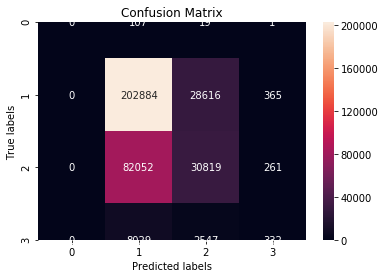

<Figure size 288x288 with 0 Axes>

In [ ]:
ax= plt.subplot()
plt.figure(figsize = (4,4))
sns.heatmap(df_cm, annot=True, ax = ax,fmt='d'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.6503373301763049

In [ ]:
# Support vector machines
from sklearn.svm import SVC
clf3 = SVC(gamma='auto')
clf3.fit(X_train, y_train)
clf3.score(X_train, y_train)
y_pred_svm = clf3.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(accuracy_svm)

In [ ]:
# Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.08)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6512476406615135


 <h1>FINAL ACCURACY</h1>

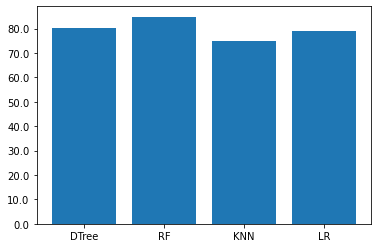

In [11]:
#test
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
accuracy = [80.14, 84.86,75, 79]


def millions(x, pos):
    'The two args are the value and tick position'
    return (x )


formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, accuracy)
plt.xticks(x, ('DTree', 'RF','KNN', 'LR'))
plt.show()